# Dicom Explorer

In [1]:
import sys
sys.path.append('../')

from MRIsegm.utils import get_slice, get_slice_info, get_rois, explore_slice, explore_roi, mask_slice

from ipywidgets import interact, fixed

## Loading Data

In [10]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patient = 'BO11/'
dir_path =  src + patient + 'T2AX'

slice = get_slice(dir_path=dir_path) 

get_slice_info(slice=slice)

The image object has the following dimensions: depth:30, height:512, width:512


In [11]:
roi_path = src + patient + 'T2ROI'

rois = get_rois(roi_path=roi_path) 
positions = [rois[i].get('position') - 1 for i in range(len(rois))]

# set(positions) to have unique values
print(f"number of masks = {len(set(positions))}")

number of masks = 17


## Plotting

### Slice

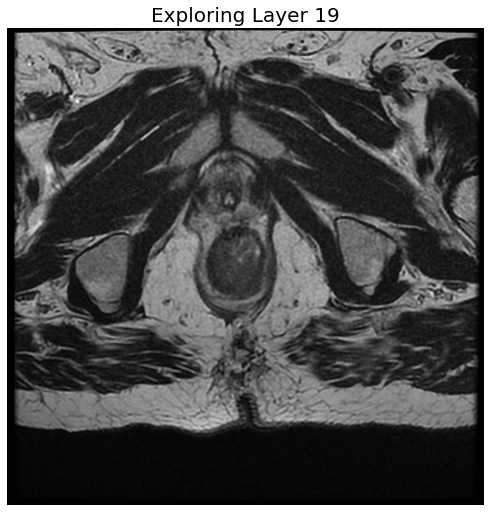

In [12]:
from random import choice

layer = choice(positions)
explore_slice(slice=slice, layer=layer)

### ROI

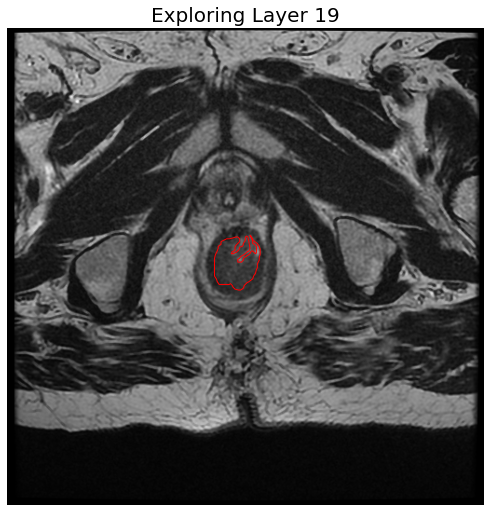

In [13]:
explore_roi(slice=slice, layer=layer, rois=rois)

### Mask

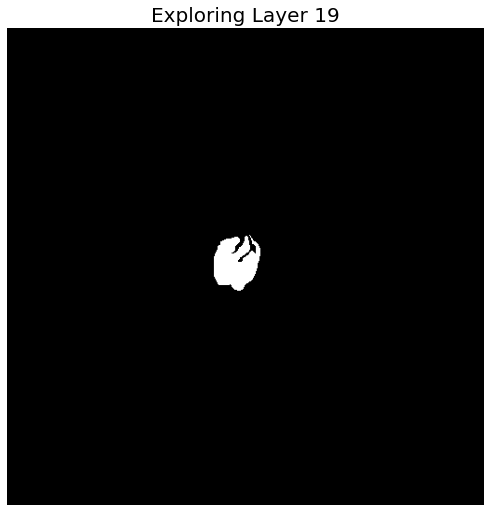

In [14]:
slice_of_masks = mask_slice(slice=slice, rois=rois)

explore_slice(slice=slice_of_masks, layer=layer)

## Interactive Exploration

In [15]:
interact(explore_slice, slice=fixed(slice), layer=(0, slice.shape[0]-1) )

interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.utils.explore_slice(slice, layer)>

In [16]:
interact(explore_roi, slice=fixed(slice), layer=(positions[0], positions[-1]), rois=fixed(rois))

interactive(children=(IntSlider(value=11, description='layer', max=19, min=3), Output()), _dom_classes=('widge…

<function MRIsegm.utils.explore_roi(slice, layer, rois)>

In [17]:
interact(explore_slice, slice=fixed(slice_of_masks), layer=(positions[0], positions[-1])) 

interactive(children=(IntSlider(value=11, description='layer', max=19, min=3), Output()), _dom_classes=('widge…

<function MRIsegm.utils.explore_slice(slice, layer)>